## 15-04-2025

In [1]:
#Sentiment Analysis using Logistic Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\91805\Downloads\NLP\IMDB Dataset.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
29994,"I enjoyed the first ""Toxic Avenger,"" but the s...",negative
29995,"New York, I Love You finally makes it to our s...",positive
29996,This movie makes you wish imdb would let you v...,negative
29997,"Space Camp, which had the unfortunate luck to ...",negative


In [3]:
df['review']=df['review'].str.lower()

In [4]:
import re
def remove_html_tag(text):
    p=re.compile('<.*?>')
    return p.sub('',text)

In [5]:
df['review']=df['review'].apply(remove_html_tag)

In [6]:
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
29994,"i enjoyed the first ""toxic avenger,"" but the s...",negative
29995,"new york, i love you finally makes it to our s...",positive
29996,this movie makes you wish imdb would let you v...,negative
29997,"space camp, which had the unfortunate luck to ...",negative


In [7]:
import string
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix,classification_report

In [8]:
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91805\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
exclude=string.punctuation
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
def preprocess(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Apply preprocessing
df['review'] = df['review'].apply(preprocess)

In [11]:
df

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive
...,...,...
29994,enjoyed first toxic avenger sequel didnt work ...,negative
29995,new york love finally makes shores 10 short st...,positive
29996,movie makes wish imdb would let vote zero one ...,negative
29997,space camp unfortunate luck planned around tim...,negative


In [12]:
df['label']=df['sentiment'].map({'positive':1,'negative':0})

In [13]:
df

,review,sentiment,label
0,one reviewers mentioned watching 1 oz episode ...,positive,1
1,wonderful little production filming technique ...,positive,1
2,thought wonderful way spend time hot summer we...,positive,1
3,basically theres family little boy jake thinks...,negative,0
4,petter matteis love time money visually stunni...,positive,1
...,...,...,...
29994,enjoyed first toxic avenger sequel didnt work ...,negative,0
29995,new york love finally makes shores 10 short st...,positive,1
29996,movie makes wish imdb would let vote zero one ...,negative,0
29997,space camp unfortunate luck planned around tim...,negative,0


In [14]:
x_train,x_test,y_train,y_test=train_test_split(df['sentiment'],df['label'],test_size=0.2,random_state=42)

In [15]:
vector=TfidfVectorizer(max_features=5000)

In [16]:
x_train_vec=vector.fit_transform(x_train)

In [17]:
x_test_vec=vector.transform(x_test)

In [18]:
model=LogisticRegression(max_iter=1000)

In [19]:
model.fit(x_train_vec,y_train)

LogisticRegression(max_iter=1000)

In [20]:
y_pred=model.predict(x_test_vec)
y_pred

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [21]:
y_prob=model.predict_proba(x_test_vec)[:,1]
y_prob

array([9.99369509e-01, 6.75513815e-04, 6.75513815e-04, ...,
       6.75513815e-04, 9.99369509e-01, 9.99369509e-01])

In [22]:
cr=classification_report(y_test,y_pred)
cr

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      3025\n           1       1.00      1.00      1.00      2975\n\n    accuracy                           1.00      6000\n   macro avg       1.00      1.00      1.00      6000\nweighted avg       1.00      1.00      1.00      6000\n'

In [23]:
auc=roc_auc_score(y_test,y_prob)
auc

1.0

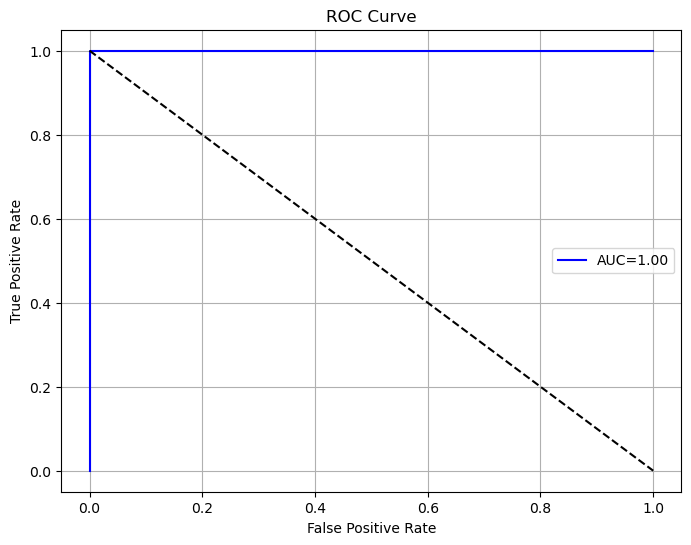

In [24]:
fpr,tpr,_=roc_curve(y_test,y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label=f'AUC={auc:.2f}',color='blue')
plt.plot([0,1],[1,0],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

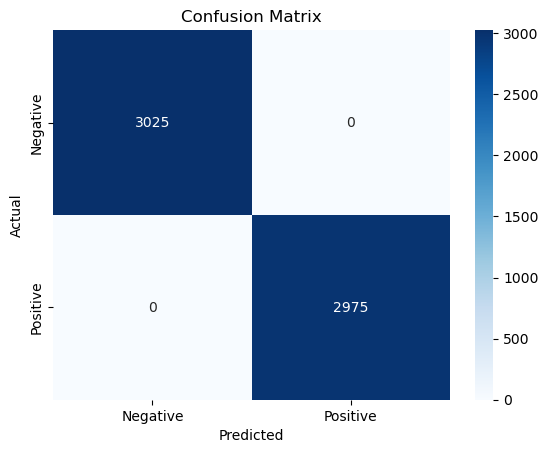

In [25]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [26]:
# Topic Modeling using LDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string

In [27]:
data = {
    "text": [
        "Apple is planning to release a new iPhone this fall.",
        "The government announced new policies on healthcare and education.",
        "Scientists discovered a new planet in a faraway galaxy.",
        "Google and Microsoft are competing in the AI race.",
        "NASA is preparing a new mission to explore the Moon.",
        "Stock markets fell after economic uncertainty.",
        "OpenAI released a powerful new language model.",
        "Elon Musk announced plans for a new Tesla factory in India.",
        "Education technology is evolving with AI-based personalized learning.",
        "Climate change remains a major issue for world leaders."
    ]
}
df = pd.DataFrame(data)
df

,text
0,Apple is planning to release a new iPhone this...
1,The government announced new policies on healt...
2,Scientists discovered a new planet in a farawa...
3,Google and Microsoft are competing in the AI r...
4,NASA is preparing a new mission to explore the...
5,Stock markets fell after economic uncertainty.
6,OpenAI released a powerful new language model.
7,Elon Musk announced plans for a new Tesla fact...
8,Education technology is evolving with AI-based...
9,Climate change remains a major issue for world...


In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.decomposition import LatentDirichletAllocation

In [29]:
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91805\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
df['text']=df['text'].str.lower()

In [31]:
df

,text
0,apple is planning to release a new iphone this...
1,the government announced new policies on healt...
2,scientists discovered a new planet in a farawa...
3,google and microsoft are competing in the ai r...
4,nasa is preparing a new mission to explore the...
5,stock markets fell after economic uncertainty.
6,openai released a powerful new language model.
7,elon musk announced plans for a new tesla fact...
8,education technology is evolving with ai-based...
9,climate change remains a major issue for world...


In [32]:
import re
def remove_html_tag(text):
    p=re.compile('<.*?>')
    return p.sub('',text)

In [33]:
df['text']=df['text'].apply(remove_html_tag)

In [34]:
df

,text
0,apple is planning to release a new iphone this...
1,the government announced new policies on healt...
2,scientists discovered a new planet in a farawa...
3,google and microsoft are competing in the ai r...
4,nasa is preparing a new mission to explore the...
5,stock markets fell after economic uncertainty.
6,openai released a powerful new language model.
7,elon musk announced plans for a new tesla fact...
8,education technology is evolving with ai-based...
9,climate change remains a major issue for world...


In [35]:
exclude=string.punctuation
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
def remove_punc(text):
    for char in exclude:
        text=text.replace(char,'')
    return text

In [37]:
df['text']=df['text'].apply(remove_punc)

In [38]:
df

,text
0,apple is planning to release a new iphone this...
1,the government announced new policies on healt...
2,scientists discovered a new planet in a farawa...
3,google and microsoft are competing in the ai race
4,nasa is preparing a new mission to explore the...
5,stock markets fell after economic uncertainty
6,openai released a powerful new language model
7,elon musk announced plans for a new tesla fact...
8,education technology is evolving with aibased ...
9,climate change remains a major issue for world...


In [39]:
def remove_stopwords(text):
    result=[]
    for word in text.split():
        if word in stopwords.words('english'):
            result.append('')
        else:
            result.append(word)
    x=result[:]
    result.clear()
    return ''.join(x)

In [40]:
df['text']=df['text'].apply(remove_stopwords)

In [41]:
df

,text
0,appleplanningreleasenewiphonefall
1,governmentannouncednewpolicieshealthcareeducation
2,scientistsdiscoverednewplanetfarawaygalaxy
3,googlemicrosoftcompetingairace
4,nasapreparingnewmissionexploremoon
5,stockmarketsfelleconomicuncertainty
6,openaireleasedpowerfulnewlanguagemodel
7,elonmuskannouncedplansnewteslafactoryindia
8,educationtechnologyevolvingaibasedpersonalized...
9,climatechangeremainsmajorissueworldleaders


In [42]:
vector=CountVectorizer(max_df=0.9,min_df=1,stop_words='english')
x=vector.fit_transform(df['text'])

In [43]:
lda=LatentDirichletAllocation(n_components=3,random_state=42)

In [44]:
lda.fit(x)

LatentDirichletAllocation(n_components=3, random_state=42)

In [45]:
def display_topics(model, feature_names, n_top_words):
    for idx, topic in enumerate(model.components_):
        print(f"\nTopic {idx + 1}:")
        print(" | ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

# Show topics
print("\n🔹 Top Words per Topic:")
display_topics(lda, vector.get_feature_names_out(), 7)


🔹 Top Words per Topic:

Topic 1:
googlemicrosoftcompetingairace | scientistsdiscoverednewplanetfarawaygalaxy | governmentannouncednewpolicieshealthcareeducation | openaireleasedpowerfulnewlanguagemodel | stockmarketsfelleconomicuncertainty | elonmuskannouncedplansnewteslafactoryindia | nasapreparingnewmissionexploremoon

Topic 2:
educationtechnologyevolvingaibasedpersonalizedlearning | climatechangeremainsmajorissueworldleaders | stockmarketsfelleconomicuncertainty | elonmuskannouncedplansnewteslafactoryindia | openaireleasedpowerfulnewlanguagemodel | governmentannouncednewpolicieshealthcareeducation | scientistsdiscoverednewplanetfarawaygalaxy

Topic 3:
nasapreparingnewmissionexploremoon | appleplanningreleasenewiphonefall | elonmuskannouncedplansnewteslafactoryindia | stockmarketsfelleconomicuncertainty | governmentannouncednewpolicieshealthcareeducation | openaireleasedpowerfulnewlanguagemodel | scientistsdiscoverednewplanetfarawaygalaxy


## 16-04-2025

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# Load the Article
from newspaper import Article

ImportError: lxml.html.clean module is now a separate project lxml_html_clean.
Install lxml[html_clean] or lxml_html_clean directly.

In [ ]:
pip install wikipedia

In [ ]:
import wikipedia

# Fetch a long Wikipedia article
wiki_text = wikipedia.page("Artificial intelligence").content
print("✅ Wikipedia article loaded successfully!")
print("Total Words:", len(wiki_text.split()))
print(wiki_text[:1000])  # Preview


In [ ]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer

In [ ]:
def sumy_summary(wiki_text,num_sentences=5):
    parser = PlaintextParser.from_string(wiki_text, Tokenizer("english"))
    summarizer = LsaSummarizer()
    summary = summarizer(parser.document, num_sentences)
    return " ".join(str(sentence) for sentence in summary)

In [ ]:
sumy_result = sumy_summary(wiki_text)
sumy_result

In [ ]:
# Abstractive Summarization with HuggingFace Transformers
!pip install transformers

In [ ]:
print("\n📄 ORIGINAL LENGTH:", len(wiki_text.split()), "words")
print("\n✂️ SUMY LENGTH:", len(sumy_result.split()), "words")

In [ ]:
import matplotlib.pyplot as plt

lengths = {
    "Original": len(wiki_text.split()),
    "Sumy": len(sumy_result.split()),
}

plt.bar(lengths.keys(), lengths.values(), color=["blue", "green", "orange", "purple"])
plt.ylabel("Word Count")
plt.title("Comparison of Summarized Text Lengths")
plt.show()


In [ ]:
# Text Preprocessing
import nltk
from nltk.corpus import stopwords
import string

In [ ]:
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))

In [ ]:
text= ["I love NLP!", "Text preprocessing is important in data science."]
text

In [ ]:
cleaned=[]
for char in text:
    words=char.lower().translate(str.maketrans('','',string.punctuation))
    filterd=[word for word in words if word not in stop_words]
    cleaned.append(" ".join(filterd))
print(cleaned)

In [ ]:
#  Bag of Words Representation
from sklearn.feature_extraction.text import CountVectorizer
text=["I love NLP", "NLP is amazing"]
vector=CountVectorizer()
x=vector.fit_transform(text)

In [ ]:
print(vector.get_feature_names_out())

In [ ]:
print(x.toarray())

In [ ]:
# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:

docs = ["NLP is fun", "I love learning NLP", "NLP stands for Natural Language Processing"]
docs

In [ ]:
tfidf=TfidfVectorizer()
xtfidf=tfidf.fit_transform(docs)

In [ ]:
print(tfidf.get_feature_names_out())

In [ ]:
print(xtfidf.toarray())

In [ ]:
#  Sentiment Analysis with Naive Bayes
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
texts = ["I love this product", "This is bad", "Very good", "Worst ever", "Excellent", "Terrible"]
labels = [1, 0, 1, 0, 1, 0]

In [ ]:
vector=CountVectorizer()
x=vector.fit_transform(texts)
y=labels

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
model=MultinomialNB()

In [ ]:
model.fit(x_train,y_train)

In [ ]:
model.score(x_test,y_test)

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for ent in doc.ents:
    print(ent.text, ent.label_)


In [ ]:
# Text Classification with TF-IDF + Logistic Regression
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv", sep='\t', names=['label', 'message'])
df

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df['message'],df['label'],test_size=0.2)

In [ ]:
vector=TfidfVectorizer()

In [ ]:
x_train_tf=vector.fit_transform(x_train)

In [ ]:
x_test_tf=vector.transform(x_test)

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x_train_tf,y_train)

In [ ]:
y_pred=model.predict(x_test_tf)
y_pred

In [ ]:

ac=accuracy_score(y_test,y_pred)
ac

In [ ]:
# Topic Modeling using Latent Dirichlet Allocation (LDA)
text=[
    "Stocks rally as tech giants report strong earnings",
    "Biden meets world leaders for climate change summit",
    "New COVID variant detected in Europe",
    "Apple launches new AI-powered Siri"
]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
vector=CountVectorizer(stop_words='english')
dtm=vector.fit_transform(text)

In [ ]:
lda=LatentDirichletAllocation(n_components=2,random_state=0)

In [ ]:
lda.fit(dtm)

In [ ]:
for idx,topic in enumerate(lda.components_):
    print(f"Topic {idx}:",[vector.get_feature_names_out()[i] for i in topic.argsort()[-5:]])

In [ ]:
# Build a Word Cloud from Tweets
!pip install wordcloud


In [ ]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
tweets = "AI is transforming healthcare and finance. AI tools like ChatGPT are changing the game."
tweets

In [ ]:
wordcloud = WordCloud(width=600, height=300, background_color='white').generate(tweets)

In [ ]:
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# POS Tagging Using NLTK

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

In [ ]:
sentence = "Machine learning models require a lot of data to perform well."


In [ ]:

tags = nltk.pos_tag(tokens)


## 17-04-2025

In [ ]:
# Named Entity Recognition (NER) using spaCy
import spacy
nlp=spacy.load('en_core_web_sm')
text = "Apple Inc. is looking to buy a startup in the UK for $1 billion."

In [ ]:
doc=nlp(text)
for ent in doc.ents:
    print(ent.text,ent.label_)

In [ ]:
# Text Classification using Logistic Regression
from sklearn.datasets import fetch_20newsgroups
category=['rec.sport.hockey','sci.med']
data=fetch_20newsgroups(subset='train',categories=category)
data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.2)

In [ ]:
vector=CountVectorizer()
x_train_vec=vector.fit_transform(x_train)
x_test_vec=vector.transform(x_test)

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x_train_vec,y_train)

In [ ]:
y_pred=model.predict(x_test_vec)
y_pred

In [ ]:
cr=classification_report(y_test,y_pred)
cr

In [ ]:
# Sentiment Analysis with VADER
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

In [ ]:
sid=SentimentIntensityAnalyzer()

In [ ]:
text="The movie was absolutely fantastic!"
sid.polarity_scores(text)

In [ ]:
#  Topic Modeling using LDA

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
docs = [
    "I love playing football.",
    "Python is an awesome programming language.",
    "Football players are very fit.",
    "Java and Python are used in software development.",
    "The World Cup is the biggest football tournament."
]

In [ ]:
vector=CountVectorizer()
x=vector.fit_transform(docs)

In [ ]:
lda=LatentDirichletAllocation(n_components=2,random_state=0)
lda.fit(x)

In [ ]:
for i, topic in enumerate(lda.components_):
    print(f"Topic{i}")
    print([vector.get_feature_names_out()[index] for index in topic.argsort()[-5:]])

In [ ]:
#  Text Classification with TF-IDF and Logistic Regression
import pandas as pd
import numpy as np

In [ ]:
data = {
    'Review': ['Amazing movie!', 'Terrible acting', 'Loved it', 'Worst film ever', 'It was good', 'Not my type'],
    'Sentiment': [1, 0, 1, 0, 1, 0]
}
df = pd.DataFrame(data)
df

In [ ]:
x_train,x_text,y_train,y_test=train_test_split(df['Review'],df['Sentiment'],test_size=0.2)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
vector=TfidfVectorizer()
x_train_vec=vector.fit_transform(x_train)
x_text_vec=vector.transform(x_text)

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x_train_vec,y_train)

In [ ]:
y_pred=model.predict(x_text_vec)
y_pred

In [ ]:
cr=classification_report(y_test,y_pred)
cr

In [ ]:
# Named Entity Recognition (NER) with spaCy
import spacy
nlp=spacy.load('en_core_web_sm')
text = "Apple Inc. was founded by Steve Jobs and is headquartered in Cupertino."
doc = nlp(text)
doc

In [ ]:
for ent in doc.ents:
    print(ent.text,ent.label_)

In [ ]:
# Topic Modeling using LDA
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
texts = ['Elections bring new policies', 'Government releases new budget',
         'Football match was exciting', 'Olympics are coming soon']
texts

In [ ]:
vector=CountVectorizer()
x=vector.fit_transform(texts)

In [ ]:
lda=LatentDirichletAllocation(n_components=2)
lda.fit(x)

In [ ]:
for idx,topic in enumerate(lda.components_):
    print(f"Topic{idx}:")
    print([vector.get_feature_names_out()[i] for i in topic.argsort()[-5:]])

In [ ]:
# Cosine Similarity Between Texts
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
texts=["Data science is amazing", "I love machine learning"]
vec=TfidfVectorizer()
tfidf=vec.fit_transform(texts)

In [ ]:
similarity=cosine_similarity(tfidf[0:1],tfidf[1:2])
print(similarity[0][0])

In [ ]:
# Text Classification with Multinomial Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
texts = ["I love this movie", "Horrible acting", "Great plot", "Terrible direction"]
labels = [1, 0, 1, 0]

In [ ]:
vector=CountVectorizer()
x=vector.fit_transform(texts)

In [ ]:
model=MultinomialNB()

In [ ]:
model.fit(x,labels)

In [ ]:
test=vector.transform(['Amazing director'])
model.predict(test)

In [ ]:
# Sentiment Classification with Logistic Regression
data = {
    'text': ['I love this phone', 'Worst experience ever', 'Amazing performance', 'Not worth the money'],
    'label': [1, 0, 1, 0]
}
df=pd.DataFrame(data)
df

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
vector=CountVectorizer()
x=vector.fit_transform(df['text'])

In [ ]:
y=df['label']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

In [ ]:
y_pred=model.predict(x_test)
y_pred

In [ ]:
ac=accuracy_score(y_test,y_pred)
ac

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

In [ ]:
cr=classification_report(y_test,y_pred)
cr

## 18-04-2025

In [ ]:
!pip install -U sentence-transformers

In [ ]:
# Text Classification using TF-IDF + Logistic Regression
texts = ["I love this movie", "This was a terrible experience", "Amazing acting", "Worst plot ever"]
labels = [1, 0, 1, 0]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
tfidf=TfidfVectorizer()
x=tfidf.fit_transform(texts)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,labels,test_size=0.2)

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

In [ ]:
model.predict(x_test)

In [ ]:
# Text Classification Using Naive Bayes
import pandas as pd
df=pd.read_csv(r"C:\Users\91805\Downloads\NLP\IMDB Dataset.csv")
df

In [ ]:
df['review']=df['review'].str.lower()

In [ ]:
import re 
def remove_html(text):
    p=re.compile('<.*?>')
    return p.sub('',text)
    

In [ ]:
df['review']=df['review'].apply(remove_html)

In [ ]:
import string
exclude=string.punctuation

In [ ]:
def remove_punctuation(text):
    for char in exclude:
        text=text.replace(char,'')
    return text

In [ ]:
df['review']=df['review'].apply(remove_punctuation)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df['review'],df['sentiment'],test_size=0.2,random_state=42)

In [ ]:
cv=CountVectorizer(stop_words='english')

In [ ]:
x_train_vec=cv.fit_transform(x_train)

In [ ]:
x_test_vec=cv.transform(x_test)

In [ ]:
model=MultinomialNB()

In [ ]:
model.fit(x_train_vec,y_train)

In [ ]:
y_pred=model.predict(x_test_vec)
y_pred

In [ ]:
ac=accuracy_score(y_test,y_pred)
ac

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

In [ ]:
cr=classification_report(y_test,y_pred)
cr

In [ ]:
tfidf=TfidfVectorizer(stop_words='english')


In [ ]:
x_train_tfidf=tfidf.fit_transform(x_train)

In [ ]:
x_test_tfidf=tfidf.transform(x_test)

In [ ]:
model2=MultinomialNB()

In [ ]:
model2.fit(x_train_tfidf,y_train)

In [ ]:
y_pred_tfidf=model.predict(x_test_tfidf)
y_pred

In [ ]:
ac=accuracy_score(y_test,y_pred_tfidf)
ac

In [ ]:
cm=confusion_matrix(y_test,y_pred_tfidf)
cm

In [ ]:
cr=classification_report(y_test,y_pred_tfidf)
cr

## 19-04-2025

In [ ]:
# Named Entity Recognition (NER) with spaCy
import spacy
nlp=spacy.load('en_core_web_sm')

In [ ]:
text='Apple was founded by steve jobs in Cupertino'
doc=nlp(text)
doc

In [ ]:
for ent in doc.ents:
    print(f"{ent.text} ({ent.label_})")

In [ ]:
# Word Similarity using Word2Vec
import gensim.downloader as api

In [ ]:
model = api.load("word2vec-google-news-300")

In [ ]:
word1='king'
word2='queen'

In [ ]:
similarity=model.similarity(word1,word2)

In [ ]:
print(f"Similarity between '{word1}' and '{word2}': {similarity:.4f}")

In [ ]:
#  Implement a Custom Tokenizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

In [ ]:
stop_words=set(stopwords.words('english'))
stemmer=PorterStemmer()
punctuations=set(string.punctuation)

In [ ]:
def tokenize(text):
    tokens=word_tokenize(text)
    cleaned_tokens=[
        stemmer.stem(word.lower())
        for word in tokens
        if word.lower() not in stop_words and word not in punctuations
    ]
    return cleaned_tokens

In [ ]:
!pip install nltk==3.8.1

In [ ]:
from nltk.tokenize import word_tokenize

text = "This is a sample sentence"
tokens = word_tokenize(text)
print(tokens)


In [ ]:
#  POS Tagging using spacy
import spacy
nlp=spacy.load('en_core_web_sm')

In [ ]:
text='I love natural language processing.'
doc=nlp(text)
doc

In [ ]:
pos_tag=[(token.text,token.pos_) for token in doc]
print(pos_tag)

In [ ]:
#  POS Tagging using NLTK
import nltk
from nltk import word_tokenize,pos_tag

In [ ]:
nltk.download('punkt')
nltk.download('averaged_preceptron_tagger')

In [ ]:
text='I love natural language processing'
tokens=word_tokenize(text)
pos_tag=pos_tag(tokens)
print(pos_tag)

## 20-04-2025

In [ ]:
# Sentiment Analysis with Pretrained VADER
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

In [ ]:
data = {
    'Review': [
        "This product is amazing! Totally worth the price.",
        "Worst experience ever. Would not recommend.",
        "It's okay, does the job but nothing special.",
        "Absolutely love it! Will buy again!",
        "Terrible quality. Broke after a week.",
        "Average product. You get what you pay for.",
        "Superb! Exceeded my expectations.",
        "Not bad, but delivery was late.",
        "Awful customer service, very disappointed.",
        "Nice design and works well. Happy with it."
    ]
}

df = pd.DataFrame(data)
df

In [ ]:
sid=SentimentIntensityAnalyzer()

In [ ]:
def get_sentiment(text):
    score=sid.polarity_scores(text)['compound']
    if score>=0.05:
        return 'Positive'
    elif score<= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [ ]:
df['sentiment']=df['Review'].apply(get_sentiment)

In [ ]:
df

In [ ]:
# Build an Inverted Index (Like a Search Engine)
import re
from collections import defaultdict

In [ ]:
documents = [
    "The sky is blue.",
    "The sun is bright.",
    "The sun in the blue sky is bright.",
    "We can see the shining sun, the bright sun."
]
documents

In [ ]:
def tokenize(text):
    text=text.lower()
    return re.findall(r'\b\w+\b',text)

In [ ]:
def build_inverted_index(docs):
    index=defaultdict(set)
    for i, doc in enumerate(docs):
        words=tokenize(doc)
        for word in words:
            index[word].add(i)
    return dict(index)

In [ ]:
inverted_index=build_inverted_index(documents)
inverted_index

In [ ]:
for word, doc_ids in inverted_index.items():
    print(f"{word}: {sorted(doc_ids)}")

In [ ]:
def boolean_search(query,index):
    tokens=query.lower().split()
    result=set()
    if "and" in tokens:
        left=index.get(tokens[0],set())
        right=index.get(tokens[2],set())
        result=left & right
    elif "or" in tokens:
        left=index.get(tokens[0],set())
        right=index.get(tokens[2],set())
        result=left | right
    elif "not" in tokens:
        universe=set(range(len(documents)))
        term=tokens[1]
        result=universe-index.get(term,set())
    else:
        result=index.get(tokens[0],set())
    return result

In [ ]:
queries = [
    "sun AND bright",
    "sky OR sun",
    "NOT blue",
    "sun",
    "bright AND blue"
]

In [ ]:
for q in queries:
    res=boolean_search(q,inverted_index)
    print(f"{q}: Documents {sorted(res)}")

In [ ]:
# Implement TF-IDF from Scratch
import numpy as np
import pandas as pd
import re
import math
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [ ]:
documents = [
    "The sky is blue.",
    "The sun is bright.",
    "The sun in the blue sky is bright.",
    "We can see the shining sun, the bright sun."
]
# tokenizer
def tokenize(text):
    text=text.lower()
    return re.findall(r'\b\w+\b',text)

In [ ]:
# Build Vacubulary
vocab=set()
token=[]
for doc in documents:
    tokens=tokenize(doc)
    token.append(tokens)
    vocab.update(tokens)
vocab=sorted(list(vocab))
vocab_index={word: idx for idx,word in enumerate(vocab)}

In [ ]:
# TF calculation
def compute_tf(doc_tokens):
    tf = np.zeros(len(vocab))
    total_terms = len(doc_tokens)
    for word in doc_tokens:
        tf[vocab_index[word]] += 1
    return tf / total_terms

In [ ]:
# IDF calculation
def compute_idf(docs):
    N = len(docs)
    df = np.zeros(len(vocab))
    for tokens in docs:
        seen = set()
        for word in tokens:
            if word not in seen:
                df[vocab_index[word]] += 1
                seen.add(word)
    idf = np.log((N) / (1 + df)) + 1  # Smooth
    return idf

In [ ]:
tf_matrix=np.array([compute_tf(tokens) for tokens in token])
tf_matrix

In [ ]:
idf_vector=compute_idf(token)
idf_vector

In [ ]:
tfidf_matrix=tf_matrix*idf_vector
tfidf_matrix

In [ ]:
tfidf_df=pd.DataFrame(tfidf_matrix,columns=vocab)
tfidf_df

In [ ]:
vector=TfidfVectorizer()

In [ ]:
sklearn_tfidf=vector.fit_transform(documents)
sklearn_tfidf

In [ ]:
sklearn_df=pd.DataFrame(sklearn_tfidf.toarray(),columns=vector.get_feature_names_out())
sklearn_df.round(3)

## 21-04-2025

In [ ]:
! pip install langdetect langid

In [ ]:
# Language Detection
from langdetect import detect,DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
import langid

In [ ]:
DetectorFactory.seed = 0

In [ ]:
sentences = [
    "Hello, how are you?",                # English
    "Bonjour, comment ça va ?",          # French
    "Hallo, wie geht es dir?",           # German
    "Hola",                              # Spanish (short)
    "Ciao",                              # Italian (ambiguous)
    "おはよう",                            # Japanese
    "Привет",                            # Russian
    "Hi",                                # English (very short)
    "la",                                # Ambiguous
]

In [ ]:
def detect_lang_langdetect(text):
    try:
        return detect(text)
    except LangDetectException:
        return "Unknown"

In [ ]:
def detect_lang_langid(text):
    lang, prob = langid.classify(text)
    return f"{lang} ({prob:.2f})"

In [ ]:
print("🔍 Language Detection Results:\n")
for sentence in sentences:
    ld = detect_lang_langdetect(sentence)
    li = detect_lang_langid(sentence)
    print(f"Text: {sentence}")
    print(f" - langdetect: {ld}")
    print(f" - langid    : {li}\n")

In [ ]:
# Language Detection
from langdetect import detect,DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
import langid

In [ ]:
DetectorFactory.seed = 0

In [ ]:
sentences = [
    "Hello, how are you?",                # English
    "Bonjour, comment ça va ?",          # French
    "Hallo, wie geht es dir?",           # German
    "Hola",                              # Spanish (short)
    "Ciao",                              # Italian (ambiguous)
    "おはよう",                            # Japanese
    "Привет",                            # Russian
    "Hi",                                # English (very short)
    "la",                                # Ambiguous
]

In [ ]:
def detect_lang_langdetect(text):
    try:
        return detect(text)
    except LangDetectException:
        return "Unknown"

In [ ]:
def detect_lang_langid(text):
    lang, prob = langid.classify(text)
    return f"{lang} ({prob:.2f})"

In [ ]:
print("🔍 Language Detection Results:\n")
for sentence in sentences:
    ld = detect_lang_langdetect(sentence)
    li = detect_lang_langid(sentence)
    print(f"Text: {sentence}")
    print(f" - langdetect: {ld}")
    print(f" - langid    : {li}\n")

## 23-04-2025

In [ ]:
# N-gram Generator
def generator_ngrams(text,n):
    tokens=text.strip().split()
    ngrams=[]
    for i in range(len(tokens)-n+1):
        ngram=tuple(tokens[i:i+n])
        ngrams.append(ngram)
    return ngrams
generator_ngrams('Natural language processing is fun',3)

In [ ]:
# Word Frequency Visualizer
def word_freq(text):
    words=text.split()
    freq={}
    for i in words:
        if i in freq:
            freq[i]+=1
        else:
            freq[i]=1
    return freq
word_freq("Natural Language Processing is fun. Language is powerful. Processing text with code is interesting and fun.")

In [ ]:
import matplotlib.pyplot as plt
def word_frequency(text):
    words=text.split()
    freq={}
    for i in words:
        freq[i]=freq.get(i,0)+1
    top_words=sorted(freq.items(),key=lambda x: x[1],reverse=True)[:10]
    words,counts=zip(*top_words)
    
    plt.figure(figsize=(10,5))
    plt.bar(words,counts,color='skyblue')
    plt.title('top 10 most frequent words')
    plt.xlabel('words')
    plt.ylabel('frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    return freq

word_frequency("Natural Language Processing is fun. Language is powerful. Processing text with code is interesting and fun.")


In [ ]:
# Word Frequency Visualizer
def word_freq(text):
    words=text.split()
    freq={}
    for i in words:
        if i in freq:
            freq[i]+=1
        else:
            freq[i]=1
    top_words = sorted(freq.items(), key=lambda x: x[1], reverse=True)[:10]
    words,counts = zip(*top_words)
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts, color='skyblue')
    plt.title("Top 10 Most Frequent Words")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    return freq
word_freq("Natural Language Processing is fun. Language is powerful. Processing text with code is interesting and fun.")


In [ ]:
def word_freq(text):
    words=text.split()
    freq={}
    for i in words:
        if i in freq:
            freq[i]+=1
        else:
            freq[i]=1
    items = list(freq.items())

# Sort the list by count in descending order
    for i in range(len(items)):
        for j in range(i + 1, len(items)):
            if items[i][1] < items[j][1]:
                items[i], items[j] = items[j], items[i]
    return items
word_freq("Natural Language Processing is fun. Language is powerful. Processing text with code is interesting and fun.")


In [ ]:
# Custom Rule-Based NER
import re
def custom_ner(text):
    date_pattern=r'\b\d{1,2}[-/]\d{1,2}[-/]\d{2,4}\b'
    dates=re.findall(date_pattern,text)
    price_pattern = r'[\$₹]\s?\d+(?:,\d{3})*(?:\.\d+)?|\d+\s?(USD|INR|Rs|rupees|dollars)'
    prices = re.findall(price_pattern, text)
    location_keywords = ['in', 'at', 'from', 'to']
    location_pattern = r'\b(?:' + '|'.join(location_keywords) + r')\s+([A-Z][a-zA-Z]+)'
    locations = re.findall(location_pattern, text)
    return {
        'dates': dates,
        'prices': prices,
        'locations': locations
    }
custom_ner('The event is on 25/04/2025 at New York. Tickets cost $150 or 120 USD. Another show on 12-05-2025 in London.')


In [ ]:
#  Text Generation Using Markov Chains
import random
def build_markov_chain(text,n):
    words=text.split()
    markov_chain={}
    for i in range(len(words)-n):
        key=tuple(words[i:i+n])
        next_word=words[i+n]
        if key not in markov_chain:
            markov_chain[key]=[]
        markov_chain[key].append(next_word)
    return markov_chain
build_markov_chain("Natural language processing is fun and natural language is powerful. Language models learn from text data.",2)


In [ ]:
#  Text Generation Using Markov Chains
import random
def build_markov_chain(text,n):
    words=text.split()
    markov_chain={}
    for i in range(len(words)-n):
        key=tuple(words[i:i+n])
        next_word=words[i+n]
        if key not in markov_chain:
            markov_chain[key]=[]
        markov_chain[key].append(next_word)
    return markov_chain

def generate_text(chain,n,length=20):
    start=random.choice(list(chain.keys()))
    output=list(start)
    for _ in range(length-n):
        current=tuple(output[-n:])
        next_words=chain.get(current)
        if not next_words:
            break
        next_word=random.choice(next_words)
        output.append(next_word)
    return ' '.join(output)
text="Natural language processing is fun and natural language is powerful. Language models learn from text data."
n=2
chain=build_markov_chain(text,n)
generated_text=generate_text(chain,n,length=25)
generated_text

In [ ]:
from IPython.display import Markdown, display
display(Markdown(f"**{generated_text}**"))


In [ ]:
# Compare Similarity Between Sentences

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def find_most_similar_sentence(p,query):
    sent=p.split('. ')
    cleaned_sent=[]
    for s in sent:
        if s:
            cleaned_sent.append(s.strip())
    sent=cleaned_sent
    corpus=sent+[query]
    vector=TfidfVectorizer()
    tfidf=vector.fit_transform(corpus)
    cosine=cosine_similarity(tfidf[-1],tfidf[:-1])
    most_similar=cosine.argmax()
    return sent[most_similar],cosine[0][most_similar]
find_most_similar_sentence("Natural language processing is a subfield of AI. It deals with text data. Machine learning models learn patterns from data. NLP is fun and useful.", "I enjoy working with text data.")


## 25-04-2025

In [ ]:
# Text Classification with Naive Bayes
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [ ]:
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', names=["label", "message"])

In [ ]:
df

In [ ]:
x=df['message']
y=df['label']

In [ ]:
vector=CountVectorizer()

In [ ]:
x_vec=vector.fit_transform(x)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_vec,y,test_size=0.3,random_state=42)

In [ ]:
model=MultinomialNB()

In [ ]:
model.fit(x_train,y_train)

In [ ]:
y_pred=model.predict(x_test)
y_pred

In [ ]:
ac=accuracy_score(y_test,y_pred)
ac

In [ ]:
# Named Entity Recognition using spaCy
import spacy
nlp=spacy.load("en_core_web_sm")
text="Apple is looking at buying U.K startup for $1 billion"
doc=nlp(text)

In [ ]:
doc

In [ ]:
for i in doc.ents:
    print(i.text,"-",i.label_)

In [ ]:
# TF-IDF Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer
corpus=[
    "I love NLP",
    "NLP is fun and exciting",
    "NLP helps machines understand language"
]


In [ ]:
vector=TfidfVectorizer()

In [ ]:
x=vector.fit_transform(corpus)

In [ ]:
df=pd.DataFrame(x.toarray(),columns=vector.get_feature_names_out())
df

In [ ]:
# Sentiment Analysis using VADER
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

In [ ]:
sia=SentimentIntensityAnalyzer()
text="I absolutely love this new phone . it is fantastic"

In [ ]:
score=sia.polarity_scores(text)
score

## 26-04-2025

In [ ]:
# Tokenization and Lemmatization(spacy)
import spacy
nlp=spacy.load("en_core_web_sm")
text='The striped bats are hanging on their feet for best'
doc=nlp(text)
for token in doc:
    print(token.text)
    print('Tokenization and Lemmatization')
    print(token.lemma_)

In [ ]:
# POS Tagging (Part of Speech)

text="The quick brown fox jumps over the lazy dog"
doc=nlp(text)
doc

In [ ]:
for token in doc:
    print(f"{token.text}-->{token.pos_}")

In [ ]:
# Bag of Words with Scikit-learn
from sklearn.feature_extraction.text import CountVectorizer

text=['NLP is fun','I love working on NLP projects']
vector=CountVectorizer()
x=vector.fit_transform(text)
print(vector.get_feature_names_out())
print(x.toarray())

In [ ]:
import nltk
from nltk.tokenize import TreebankWordTokenizer
from collections import Counter

text = "This is a sample sentence for testing tokenization."

tokenizer = TreebankWordTokenizer()
words = tokenizer.tokenize(text)
word_freq = Counter(words)

print(word_freq)


In [ ]:
def word_freq(text):
    word=text.split()
    d={}
    for char in word:
        if char in d:
            d[char]+=1
        else:
            d[char]=1
    return d
word_freq("This is a sample sentence for testing tokenization.")

In [ ]:
#  Topic Modeling with LDA 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
docs = ["I love playing football", "Football is a great sport", "I love cooking and making food", "Cooking is my passion"]
vector=CountVectorizer()
x=vector.fit_transform(docs)

In [ ]:
lda=LatentDirichletAllocation(n_components=2,random_state=42)
lda.fit(x)

In [ ]:
for idx,topic in enumerate(lda.components_):
    print(f"Topic {idx}:", [vector.get_feature_names_out()[i] for i in topic.argsort()[-3:]])

In [ ]:
#  Language Detection
from langdetect import detect
text="Bonjour, comment ça va?"
print(detect(text))

In [ ]:
from langdetect import detect

text = "Ciao, come stai?"
print(detect(text))  # Output: 'it' (Italian)


In [ ]:
from langdetect import detect

text = "Quiero ir al cine."
print(detect(text))  # Output: 'it' (Italian)


In [ ]:
print('hello world')

## 28-04-2025

In [ ]:
#  POS Tagging (Part of Speech)

text="The quick brown fox jumps over the lazy dog"
doc=nlp(text)
for token in doc:
    print(f"{token.text}-->{token.pos_}")

In [ ]:
# Text Similarity using Cosine Similarity

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

text1="i love machine learning"
text2="Machine learning is amazing"

vector=TfidfVectorizer()
tfidf=vector.fit_transform([text1,text2])

similarity=cosine_similarity(tfidf[0:1],tfidf[1:2])
print(similarity)
print(similarity[0][0])

In [ ]:
# Building a Word Cloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = "NLP Deep Learning Machine Learning AI"
wordcloud = WordCloud(width=800, height=400).generate(text)

In [ ]:
plt.figure(figsize=(10,5)) # 'auto', 'nearest', 'bilinear','bicubic', 'spline16', 'spline36', 'hanning'
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis=('off')
plt.show()

In [ ]:
from transformers import pipeline

generator = pipeline('text-generation', model='gpt2', framework='pt')
text = generator("Once upon a time,", max_length=50, num_return_sequences=1)

print(text[0]['generated_text'])


## 29-04-2025

In [2]:
# Named Entity Recognition (NER) using spaCy
import spacy

# Load the small English model
nlp = spacy.load('en_core_web_sm')

# Sample text
text = "Apple is planning to open a new office in Bangalore by December 2025."

# Process the text
doc = nlp(text)

# Extract entities
for ent in doc.ents:
    print(ent.text, "=>", ent.label_)


Apple => ORG
Bangalore => PERSON
December 2025 => DATE


In [4]:
!pip install textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/1e/d6/40aa5aead775582ea0cf35870e5a3f16fab4b967f1ad2debe675f673f923/textblob-0.19.0-py3-none-any.whl.metadata
  Obtaining dependency information for nltk>=3.9 from https://files.pythonhosted.org/packages/4d/66/7d9e26593edda06e8cb531874633f7c2372279c3b0f46235539fe546df8b/nltk-3.9.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/624.3 kB 660.6 kB/s eta 0:00:01
   --------- ------------------------------ 143.4/624.3 kB 1.4 MB/s eta 0:00:01
   ----------------- ---------------------- 276.5/624.3 kB 1.9 MB/s eta 0:00:01
   ------------------------ --------------- 389.1/624.3 kB 2.2 MB/s eta 0:00:01
   ---------------------------------- ----- 532.5/624.3 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 624.3/624.3 kB

In [5]:
# Sentiment Analysis using TextBlob

from textblob import TextBlob

# Sample text
review = "I absolutely love the new features of the iPhone. Fantastic experience!"

# Create TextBlob object
blob = TextBlob(review)

# Sentiment
print("Polarity:", blob.sentiment.polarity)
print("Subjectivity:", blob.sentiment.subjectivity)


Polarity: 0.37878787878787873
Subjectivity: 0.6515151515151515


In [6]:
# TF-IDF Vectorization

from sklearn.feature_extraction.text import TfidfVectorizer

# Sample corpus
corpus = [
    "Machine learning is fascinating.",
    "Natural Language Processing combines linguistics and machine learning.",
    "Deep learning revolutionized AI."
]

# Create vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform
X = vectorizer.fit_transform(corpus)

# Feature names
print(vectorizer.get_feature_names_out())

# TF-IDF matrix
print(X.toarray())


['ai' 'and' 'combines' 'deep' 'fascinating' 'is' 'language' 'learning'
 'linguistics' 'machine' 'natural' 'processing' 'revolutionized']
[[0.         0.         0.         0.         0.5844829  0.5844829
  0.         0.34520502 0.         0.44451431 0.         0.
  0.        ]
 [0.         0.37994462 0.37994462 0.         0.         0.
  0.37994462 0.22440141 0.37994462 0.28895767 0.37994462 0.37994462
  0.        ]
 [0.54645401 0.         0.         0.54645401 0.         0.
  0.         0.32274454 0.         0.         0.         0.
  0.54645401]]


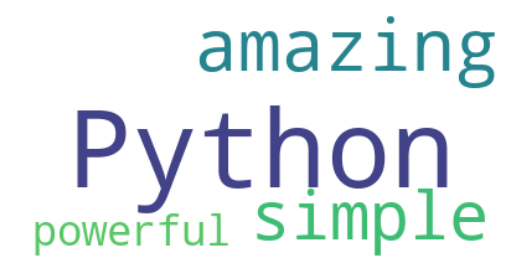

In [7]:
# Word Cloud Visualization

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample text
text = "Python is amazing. Python is simple. Python is powerful."

# Generate a word cloud
wordcloud = WordCloud(background_color='white').generate(text)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


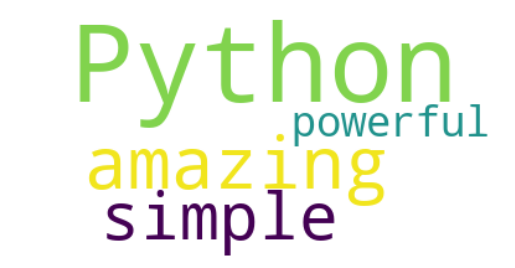

In [5]:
# Word Cloud Visualization

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample text
text = "Python is amazing. Python is simple. Python is powerful."

# Generate a word cloud
wordcloud = WordCloud(background_color='white').generate(text)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
